# **Superstore Sales & Profit Analysis**

## **Project Overview**

*This project analyzes a retail superstore’s sales and profit data to uncover key business insights. The goal is to understand product performance, customer trends, discount impact, regional profitability, and overall sales dynamics using data analysis techniques in Python.*

### **Dataset Information:-**

1. Dataset name: Superstore Sales Dataset
2. File format: .csv or .xlsx
3. Number of rows: (fill after loading)
4. Number of columns: (fill after loading)

### **Key Columns:-**

* Order Date
* Ship Date
* Category
* Sub-Category
* Sales
* Profit
* Discount
* Quantity
* Customer Name
* Region
* Segment

### **Importing Required Libraries**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the Dataset**

In [41]:
df = pd.read_csv("/content/drive/MyDrive/Dataset - Project/Sample - Superstore.csv",encoding="latin-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### **Understanding the Data**

In [42]:
df.shape
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Observations:**

Number of rows = 9994

Number of features = 26

Data types seem appropriate / need conversion

No. of missing values in dataset = 0

### **Data Cleaning & Preprocessing**

*Converting date columns*

In [43]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

*Creating year-month features*

In [44]:
df['Order_Year'] = df["Order Date"].dt.year
df['Order_Month'] = df["Order Date"].dt.month
df['Order_YearMonth'] = df["Order Date"].dt.to_period('M')

*Checking for duplicates*

In [45]:
df.duplicated().sum()

np.int64(0)

*Checking missing values*

In [46]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


*Feature Engineering*

In [47]:
df['Profil_Margin'] = df['Profit']/ df['Sales']
df['Ship_Days'] = ( df['Ship Date'] - df['Order Date']).dt.days

### **Exploratory Data Analysis (EDA)**

*Total Sales & Profit*

In [48]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_orders = df["Order ID"].nunique()

total_sales, total_profit, total_orders

(np.float64(2297200.8603000003), np.float64(286397.0217), 5009)

**Insight:**

* Total Sales = ₹ 2297200.86030000030
* Total Profit = ₹ 286397.0217
* Total unique orders = 5009

*Sales & Profit by Category*

In [49]:
category_summary = df.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
category_summary


,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


**Insight:**

* Most sales from: Technology Category
* Highest profit from: Technology Category

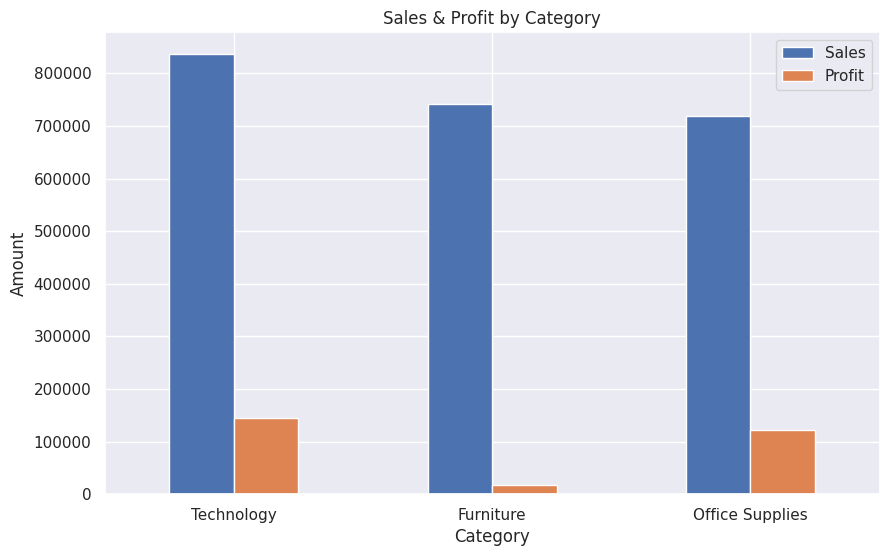

In [50]:
category_summary.plot(kind="bar")
plt.title("Sales & Profit by Category")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()

*Sales & Profit by Sub-Category*

In [51]:
subcat_summary = df.groupby("Sub-Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
subcat_summary.head(10)

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


**Insight:**

* Best performing sub-category: Phones
* High-sales but low-profit categories: Phones

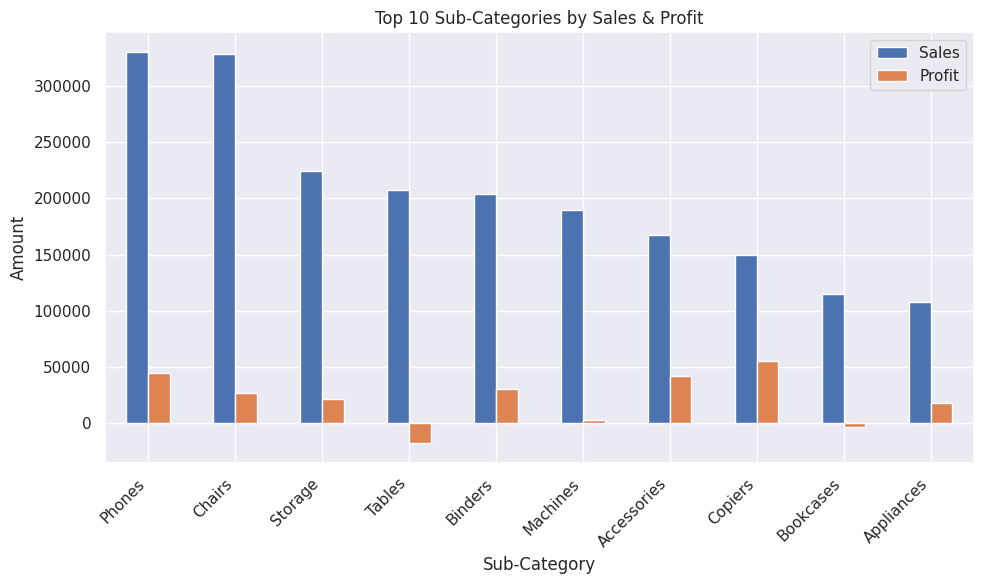

In [52]:
subcat_summary.head(10).plot(kind="bar")
plt.title("Top 10 Sub-Categories by Sales & Profit")
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

*Region-wise sales performance*

In [53]:
region_summary = df.groupby("Region")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False)
region_summary

,Sales,Profit
Region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
Central,501239.8908,39706.3625
South,391721.9050,46749.4303


**Insight:**

* Top region: West
* Region with lowest profit: South

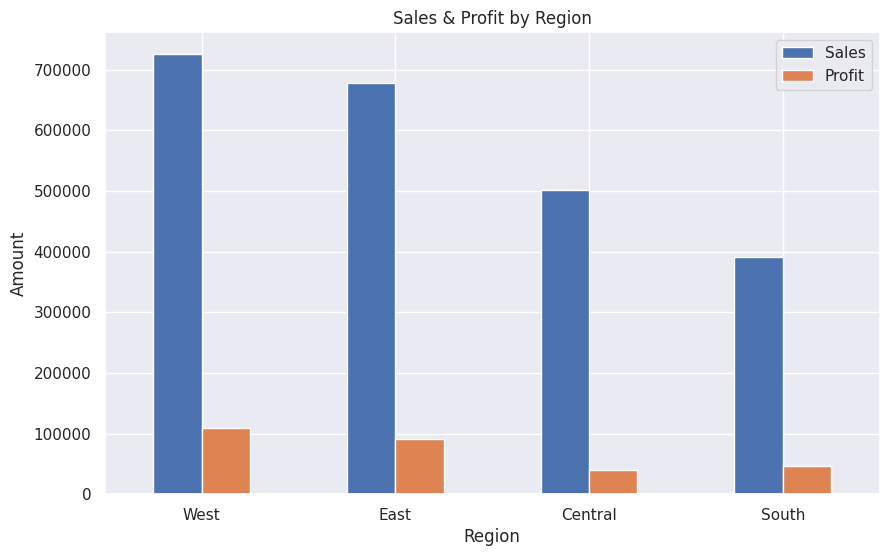

In [54]:
region_summary.plot(kind="bar")
plt.title("Sales & Profit by Region")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()

### *Monthly Sales trend*

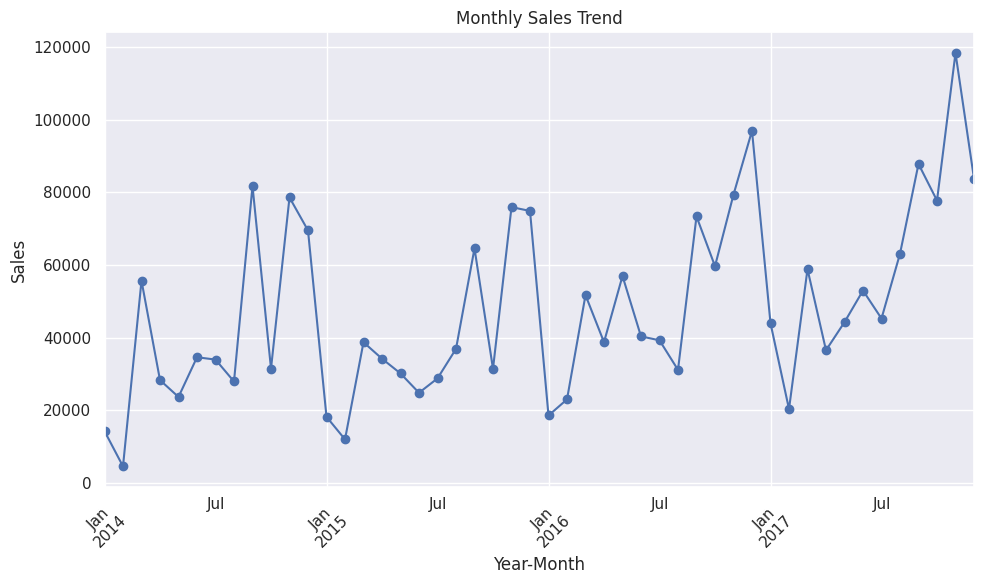

In [55]:
monthly_sales = df.groupby("Order_YearMonth")["Sales"].sum()

monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Year-Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**

* Trend is upward
* Sales spike at: months

### *Discount vs Profit Relationship*

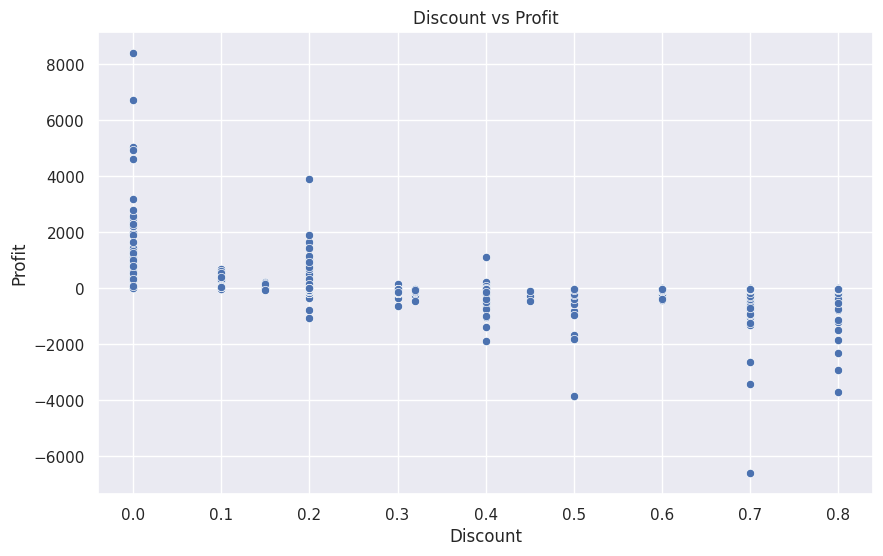

In [56]:
sns.scatterplot(x="Discount", y="Profit", data=df)
plt.title("Discount vs Profit")
plt.show()

**Insight:**

* Higher discount results in negative profit
* Certain discounts still maintain profitability

### *Top 10 Customers*

In [57]:
customer_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)
customer_sales

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


Insight:

* Top customer contributes ₹…
* Top 10 customers contribute …% of total sales

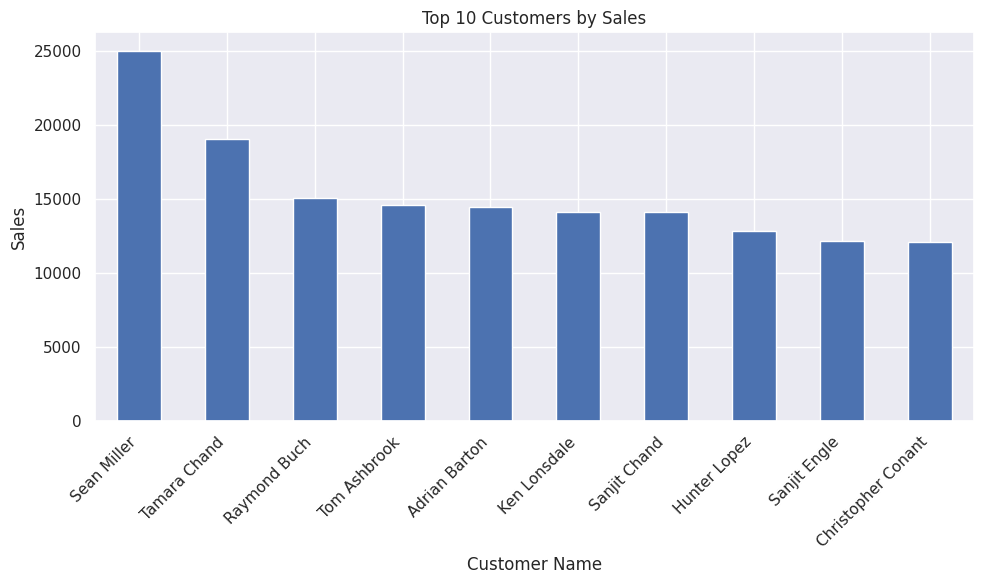

In [58]:
customer_sales.plot(kind="bar")
plt.title("Top 10 Customers by Sales")
plt.ylabel("Sales")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## **Machine Learning Concept**

In [59]:
df["Profitable"] = (df["Profit"] > 0).astype(int)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

features = ["Sales", "Discount", "Quantity"]
X = df[features]
y = df["Profitable"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9364682341170585
              precision    recall  f1-score   support

           0       0.98      0.67      0.80       377
           1       0.93      1.00      0.96      1622

    accuracy                           0.94      1999
   macro avg       0.96      0.84      0.88      1999
weighted avg       0.94      0.94      0.93      1999



**Insight:**

* Model accuracy: 0.9365%

## **Final Insights & Business Recommendations**

**Write in clear bullet points:**

* Category A contributes highest profit
* Sub-Category B generates heavy loss due to discounting
* Region C should be targeted for growth
* Implement discount limits to prevent loss
* Target top-spending customers with loyalty program
* Reduce shipping time where Ship_Days is high

### **Conclusion**

*This analysis provides detailed insight into customer behavior, product performance, profitability, and operational inefficiencies. With proper strategy on discounting, regional focus, and inventory, the company can improve overall profit and sales.*